# Accidental Drug Related Deaths CT : EDA

## Introduction
This notebook will perform the exploratory data analysis of the cleaned CT accidental overdose dataset. I will be using tables and visualization to both summarize and gain better insight into the overdose epidemic that Connecticut has been facing. 


### Data Sources/Related Files

The dataset used for this notebook is the cleaned/Transformed data that is prepared using the cleaning_CT_OD_data.py file to produce: <b>"Clean_Transformed_Accidental_Drug_Related_Deaths_2012-2018.csv"</b>

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import csv
import datetime
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
pd.options.display.width = 100

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
# read in the data
file = "C:/Users/Jeff/Desktop/Projects/Data Science Portfolio/CT_overdose_deaths/Clean_Transformed_Accidental_Drug_Related_Deaths_2012-2018.csv"

# changing dtypes on attributes
col_dtype = {'week': int, 'month': int, 'year': int, 'age': int, 'Age_Bin': 'category',
             'Sex_Cat': 'category', 'Race_Cat': 'category', 'DeathCounty': 'category'
            }

df = pd.read_csv(file, parse_dates=['Date'], dtype=col_dtype)

# Analysis




First. I'll take a broad look at the non-drug attributes in the dataset to see if any obvious patterns in the data emerge. Simple histograms and other bar charts should be helpful in this case for these attrtibutes. I will then move to begin looking at the drugs themselves as well as drug usage by age groups and by county.



In [20]:
 #df.info()

## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12233AF0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12328B90>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133CAD50>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1340E250>]],
      dtype=object)

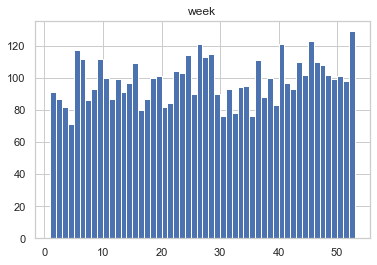

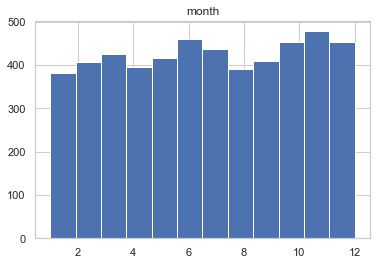

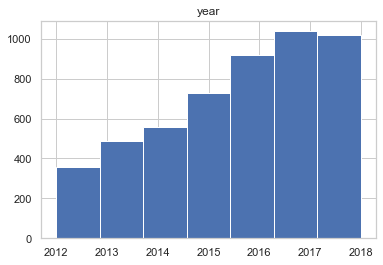

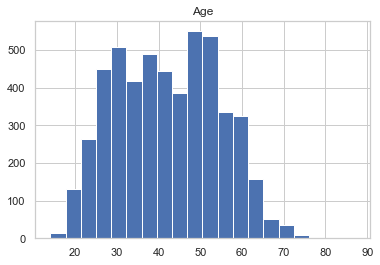

In [4]:
# univariate analysis of a few of the time attributes and Age

df.hist('week', bins = 52)
df.hist('month', bins = 12)
df.hist('year', bins = 7)
df.hist('Age', bins = 20)

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Proportion')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 1.0, '0 = Female, 1 = Male, 2 = Unknown')

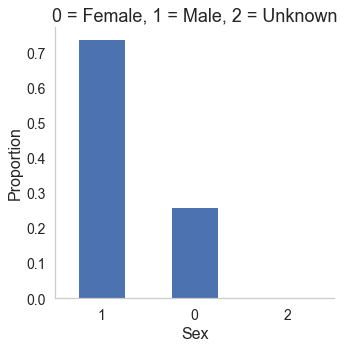

In [5]:
# Breakdown of overdose deaths by Sex and Race

#df['Sex_Cat'].value_counts()
df['Sex_Cat'].value_counts(normalize = True).plot(kind = 'bar', figsize=(5,5), rot = 0)
plt.xlabel("Sex", fontsize=16)
plt.ylabel("Proportion", fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('0 = Female, 1 = Male, 2 = Unknown', fontsize = 18)
sns.despine()


White                     0.784329
Hispanic, White           0.109892
Black                     0.084819
Unknown                   0.007052
Hispanic, Black           0.004701
Asian, Other              0.003526
Asian Indian              0.002742
Other                     0.002155
Chinese                   0.000392
Hawaiian                  0.000196
Native American, Other    0.000196
Name: Race, dtype: float64

Text(0.5, 1.0, 'Total Overdose Deaths by Race')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

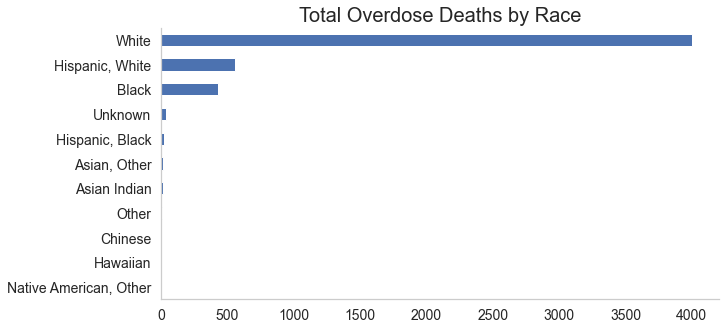

In [6]:
# Breakdown of deaths by Race

df['Race'].value_counts(normalize = True)
df['Race'].value_counts(ascending = True).plot(kind = 'barh', figsize=(10,5))
plt.title('Total Overdose Deaths by Race', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

<b>From the univariate analysis, we can see that deaths per year have been increasing since 2012, topping out at 2017, with a slight decrease in 2018.</b> 
<br>

<b> Looking at the 'Age' histogram, we can observe that people between the approximate ages of 30 to 50 represent the most deaths. In particular, people in their late 40s and early 50s represent the highest number of deaths</b>
<br>

<b> 



Text(0.5, 1.0, 'Total Overdose Deaths by County')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text major ticklabel objects>)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

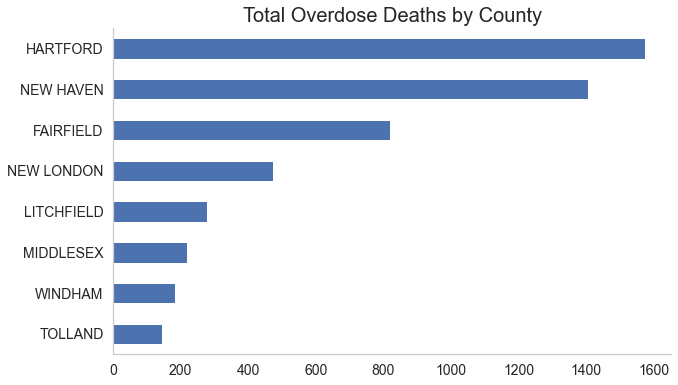

In [7]:
# Looking at the county breakdown of total deaths from 2012-2018

df['DeathCounty'].value_counts().plot(kind = 'barh',figsize=(10,6)).invert_yaxis()
plt.title('Total Overdose Deaths by County', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

Text(0.5, 1.0, 'Top 25 Total Overdose Deaths by City')

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

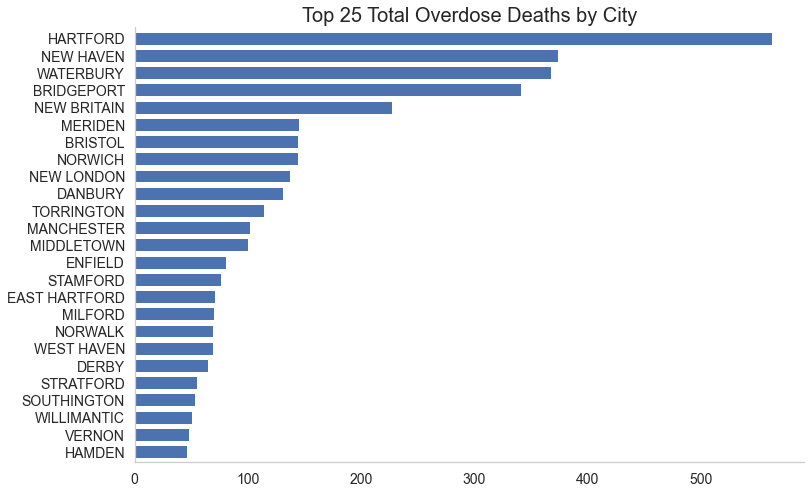

In [8]:
# Only looking at top 25 Cities for accidental overdose deaths

df['DeathCity'].value_counts().sort_values()[::-1][:25].plot(kind = 'barh',width = .75,figsize=(12,8)).invert_yaxis()
plt.title('Top 25 Total Overdose Deaths by City', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

Text(0.5, 1.0, 'Overdose Deaths by Location')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

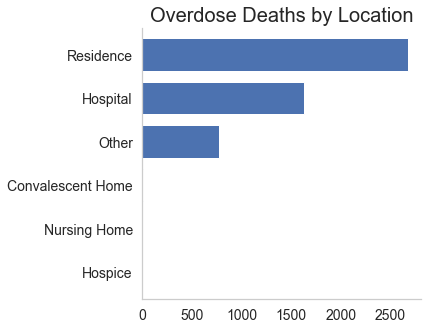

In [9]:
# Only looking at top 25 Cities for accidental overdose deaths

df['Location'].value_counts().sort_values(ascending = False).plot(kind = 'barh',width = .75,figsize=(5,5)).invert_yaxis()
plt.title('Overdose Deaths by Location', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

Text(0.5, 1.0, "Top 25 Overdose Deaths by 'Other' Location")

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text major ticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

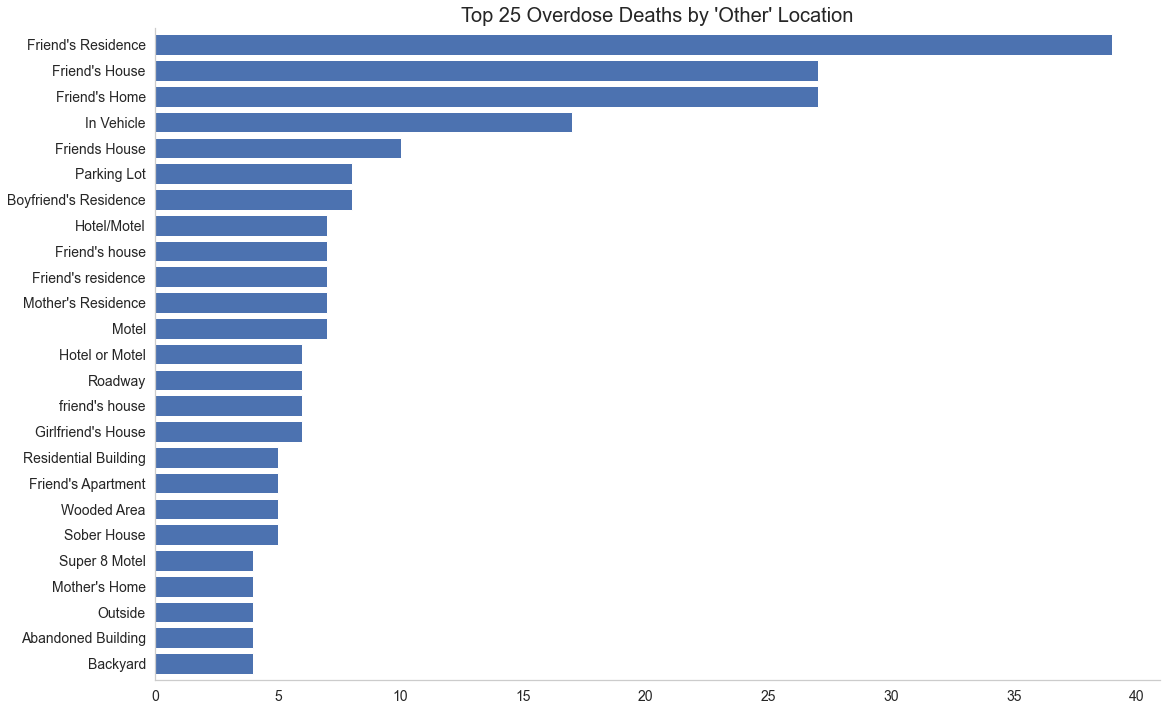

In [10]:
df['LocationifOther'].value_counts().sort_values()[::-1][:25].plot(kind = 'barh',width = .80,figsize=(18,12)).invert_yaxis()
plt.title('Top 25 Overdose Deaths by \'Other\' Location', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

Text(0.5, 1.0, "Top 25 'COD'")

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

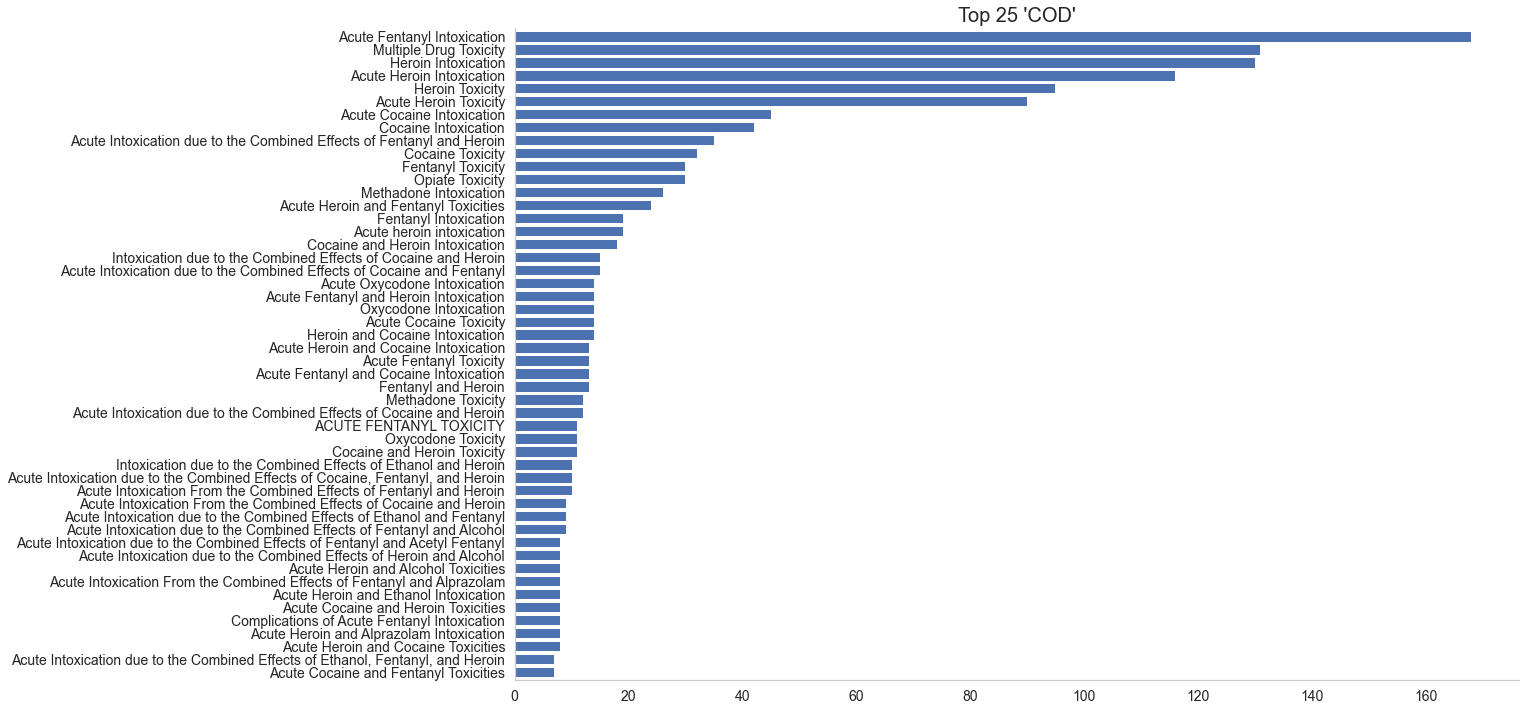

In [11]:
df['COD'].value_counts().sort_values()[::-1][:50].plot(kind = 'barh',width = .80,figsize=(18,12)).invert_yaxis()
plt.title('Top 25 \'COD\'', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

Text(0.5, 1.0, "Top 25 Overdose Deaths by 'Other'Drugs")

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

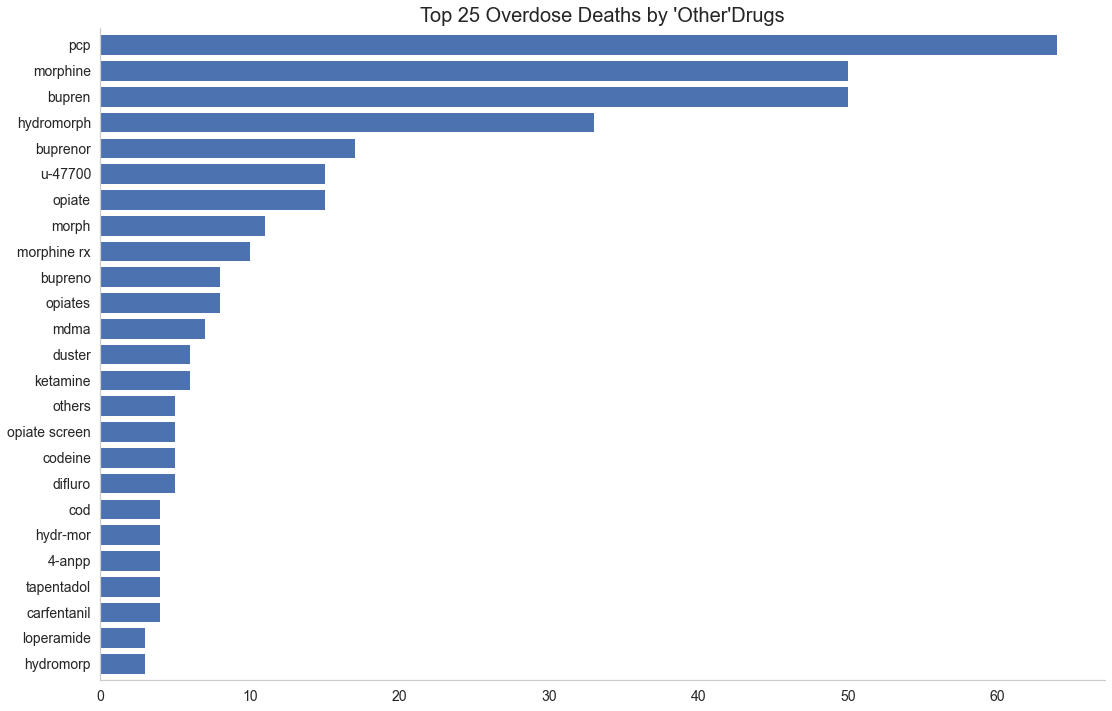

In [12]:
# make all values lowercase
#
df['Other'] = df['Other'].str.lower()

df['Other'].value_counts().sort_values()[::-1][:25].plot(kind = 'barh',width = .80,figsize=(18,12)).invert_yaxis()
plt.title('Top 25 Overdose Deaths by \'Other\'Drugs', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

## Analyzing Grouped Variables

<Figure size 1080x720 with 0 Axes>

Text(0, 0.5, 'Number of Deaths\n')

Text(0.5, 0, '\nYear')

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.]),
 <a list of 9 Text major ticklabel objects>)

(array([ 300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 1.0, 'CT Accidental Overdose Deaths 2012-2018')

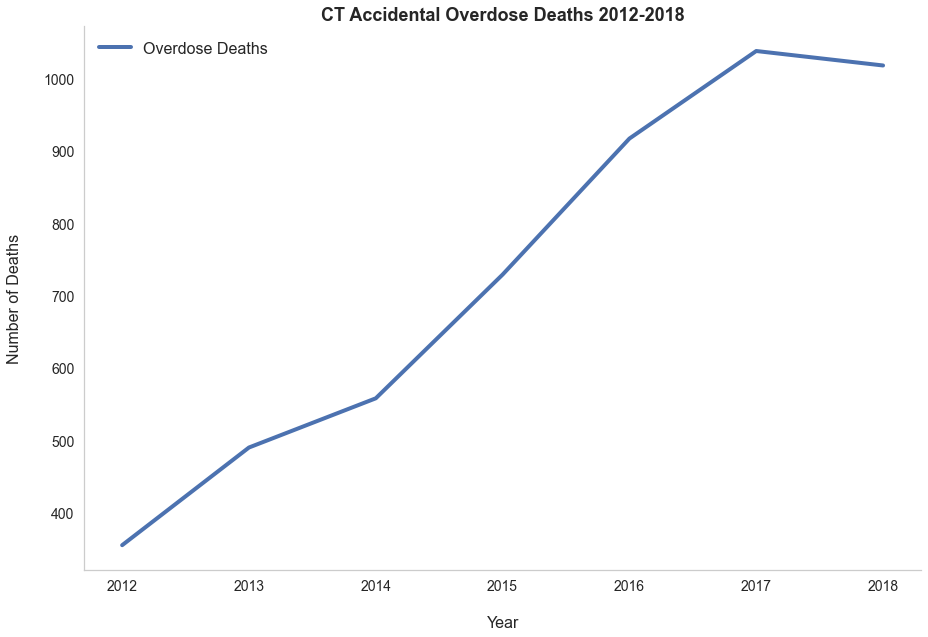

In [13]:
#plot the total count of deaths per year 
sns.set_style("whitegrid", {'axes.grid' : False})
deaths_per_year = pd.pivot_table(df,index=['year'],values=["ID"],aggfunc=['count'],margins=False)
#deaths_per_year
plt.figure(figsize=(15,10))
plt.plot(deaths_per_year, label = 'Overdose Deaths',lw = 4)
plt.legend(fontsize = 14)
plt.ylabel('Number of Deaths\n',fontsize = 16) 
plt.xlabel('\nYear',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("CT Accidental Overdose Deaths 2012-2018", fontsize=18, fontweight='bold')
plt.legend(loc='upper left', frameon=False, prop={"size":16})
sns.despine()
plt.show()

Text(0.5, 1.0, 'CT Accidental Overdose Deaths by Drug 2012-2018')

Text(0, 0.5, 'Number of Deaths\n')

Text(0.5, 0, '\nYear')

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.]),
 <a list of 9 Text major ticklabel objects>)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]), <a list of 10 Text major ticklabel objects>)

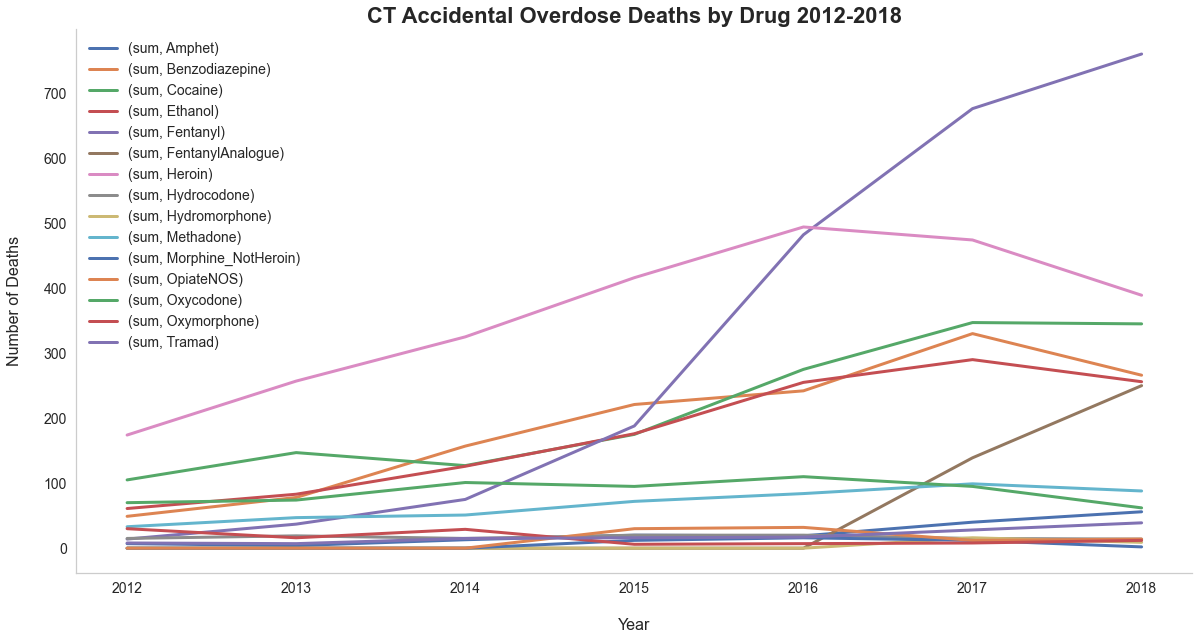

In [14]:
# Looking at all recorded overdoses by specific drugs visually over time. 

drugs = ['year','Heroin', 'Cocaine','Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone',
        'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS']

df_drugs = df.loc[:,drugs]

df_by_year = pd.pivot_table(df_drugs,index=['year'],aggfunc=['sum'],margins=False).plot(figsize=(20,10),lw = 3)
plt.title("CT Accidental Overdose Deaths by Drug 2012-2018", fontsize=22, fontweight='bold')
plt.ylabel('Number of Deaths\n',fontsize = 16)
plt.xlabel('\nYear',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left')
plt.legend(frameon=False,fontsize = 14)
sns.despine()

In [15]:
# Looking for whether multiple drugs are involved with some overdoses
#count occurences of drugs per overdose death

import sidetable
drug_counts = df_drugs.drop(columns = {'year'})
drug_counts['num_drugs_involved'] = drug_counts.sum(axis=1)

drug_counts.stb.freq(['num_drugs_involved'],style = True)

,num_drugs_involved,count,percent,cumulative_count,cumulative_percent
0,2,"1,866",36.55%,"1,866",36.55%
1,1,"1,453",28.46%,"3,319",65.01%
2,3,"1,158",22.68%,"4,477",87.70%
3,4,421,8.25%,"4,898",95.95%
4,5,100,1.96%,"4,998",97.90%
5,0,79,1.55%,"5,077",99.45%
6,6,27,0.53%,"5,104",99.98%
7,7,1,0.02%,"5,105",100.00%


<b>Most overdose deaths (~70%) involve more than 1 drug in the victim's system. Therefore we cannot look at each instance of an overdose to generally be attributed to one drug</b>

<Figure size 1080x720 with 0 Axes>

Text(0, 0.5, 'Number of Deaths\n')

Text(0.5, 0, '\nDate')

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.]),
 <a list of 9 Text major ticklabel objects>)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]), <a list of 11 Text major ticklabel objects>)

Text(0.5, 1.0, 'Accidental Opioid Overdoses by Category 2012-2018')

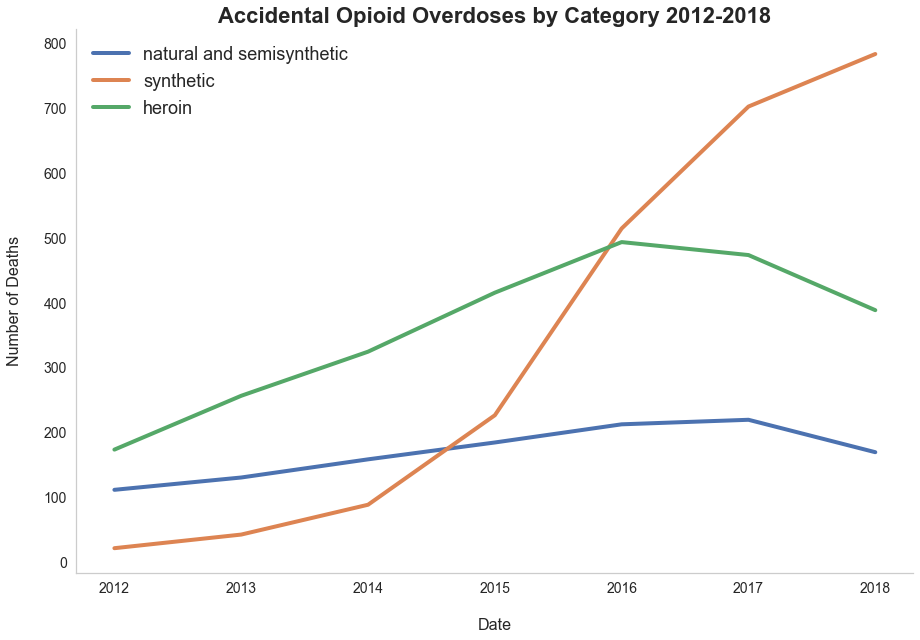

In [16]:
# it may be more beneficial to break up the opiods by the main opioid categories:
# natural/semi-sythinetics, sythentics, and Heroin

sns.set_style("whitegrid", {'axes.grid' : False})

nat = pd.pivot_table(df,index=['year'],values=["opioid_nat"],aggfunc=['sum'],margins=False)
synt = pd.pivot_table(df,index=['year'],values=["opioid_synt"],aggfunc=['sum'],margins=False)
heroin = pd.pivot_table(df,index=['year'],values=["Heroin"],aggfunc=['sum'],margins=False)

plt.figure(figsize=(15,10))
plt.plot(nat, label = 'natural and semisynthetic',lw = 4)
plt.plot(synt, label = 'synthetic',lw = 4)
plt.plot(heroin, label = 'heroin',lw = 4)
plt.ylabel('Number of Deaths\n',fontsize = 16)
plt.xlabel('\nDate',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Accidental Opioid Overdoses by Category 2012-2018", fontsize=22, fontweight='bold')
plt.legend(loc='upper left', frameon=False, prop={"size":18})
sns.despine()
plt.show()

<b> Above: I have grouped the opiods into their resepctive categories: natural/semi-sythinetics, sythentics, and Heroin. Natural/semi-synthetic include opiates such as Oxycodone and Hydrocodone. Synthetic opiates include drugs such as Fentynal and Tramad. Heroin is considered to be in its own category. It is shocking to observe the sharp uptick in the role that synthetic opioids' have played regarding overdose deaths. </b> <br>
    
<b> Below:  I will look at overdose deaths by age bin over time to see if some age groups are trending up or down. This can be helpful to better understand so that state and county officials can better target preventative measures by age group. </b>

In [17]:
death_by_Age_Bin = pd.crosstab(df['year'],df['Age_Bin'],margins = True, margins_name = 'Total').T
death_by_Age_Bin['Yearly_Average'] = (death_by_Age_Bin['Total']/7).round(2)
death_by_Age_Bin
print(f"Aqverage deaths per year by {death_by_Age_Bin['Yearly_Average']}:")
print()
print('Total Deaths per Age_Bin')
df.stb.freq(['Age_Bin'],style = True)

year,2012,2013,2014,2015,2016,2017,2018,Total,Yearly_Average
Age_Bin,,,,,,,,,
0-14,0,0,1,0,0,0,0,1,0.14
15-24,40,48,41,62,63,81,71,406,58.00
25-34,86,119,129,172,233,271,231,1241,177.29
35-44,72,106,152,156,214,253,263,1216,173.71
45-54,109,137,163,188,238,238,253,1326,189.43
55-64,39,74,56,130,150,177,165,791,113.00
65-74,8,5,14,21,19,18,33,118,16.86
75-84,1,0,2,0,0,0,2,5,0.71
85+,0,1,0,0,0,0,0,1,0.14


Aqverage deaths per year by Age_Bin
0-14       0.14
15-24     58.00
25-34    177.29
35-44    173.71
45-54    189.43
55-64    113.00
65-74     16.86
75-84      0.71
85+        0.14
Total    729.29
Name: Yearly_Average, dtype: float64:

Total Deaths per Age_Bin


,Age_Bin,count,percent,cumulative_count,cumulative_percent
0,45-54,"1,326",25.97%,"1,326",25.97%
1,25-34,"1,241",24.31%,"2,567",50.28%
2,35-44,"1,216",23.82%,"3,783",74.10%
3,55-64,791,15.49%,"4,574",89.60%
4,15-24,406,7.95%,"4,980",97.55%
5,65-74,118,2.31%,"5,098",99.86%
6,75-84,5,0.10%,"5,103",99.96%
7,85+,1,0.02%,"5,104",99.98%
8,0-14,1,0.02%,"5,105",100.00%


Text(0.5, 1.0, 'Number of Overdose Deaths by Year and Age Group \n')

Text(0, 0.5, 'Number of Deaths\n')

Text(0.5, 0, '\nYear')

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.]),
 <a list of 9 Text major ticklabel objects>)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

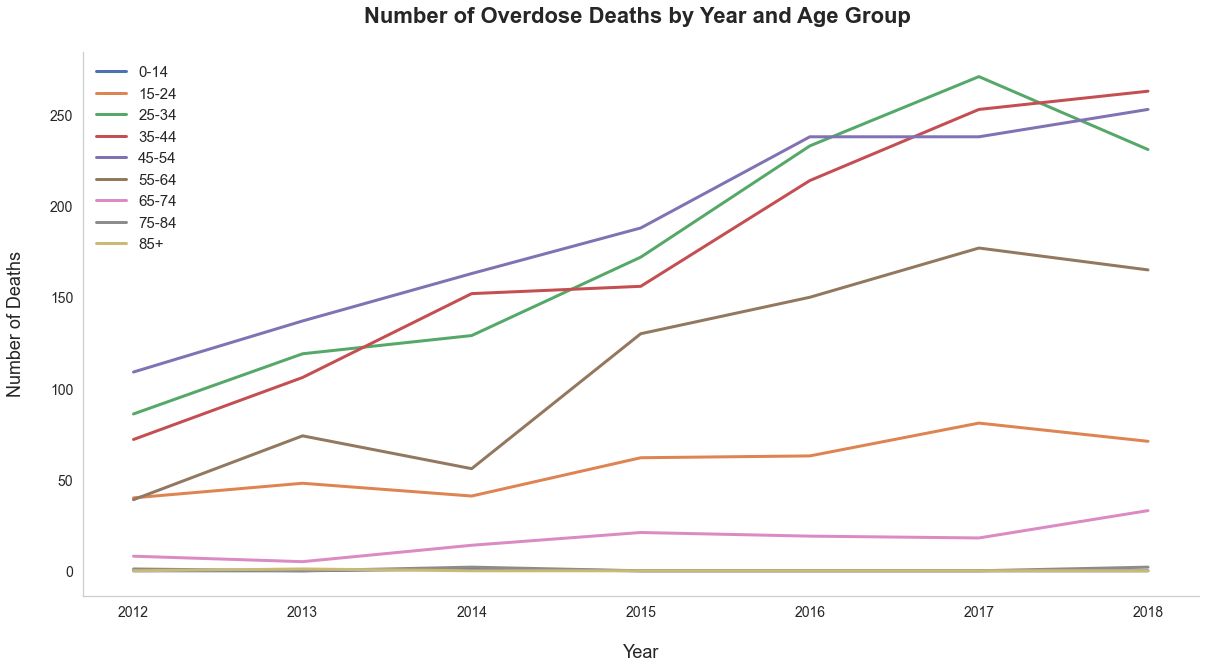

In [18]:
# visualizing deaths per Age_Bin from 2012-2018

pd.crosstab(df['year'],df['Age_Bin']).plot(figsize=(20,10),lw = 3)
plt.title('Number of Overdose Deaths by Year and Age Group \n',fontsize = 22,fontweight='bold')
plt.ylabel('Number of Deaths\n',fontsize = 18)
plt.xlabel('\nYear',fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize = 15, frameon=False)
sns.despine()


<b> Using the crosstab function, let's take a look at age groups and counties of all overdose deaths in Connecticut</b>

We can observe in the crosstab above the proportion of overdoses per county per age group. With the added heatmap characteristics it is easier to see where the most deaths are occurring per age group and county

<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, 'Total Proportion of Overdose Deaths by Age Group by County\n')

Text(0.5, 229.5800000000001, 'County')

Text(120.5, 0.5, 'Age Group\n')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 229.5800000000001, 'County\n')

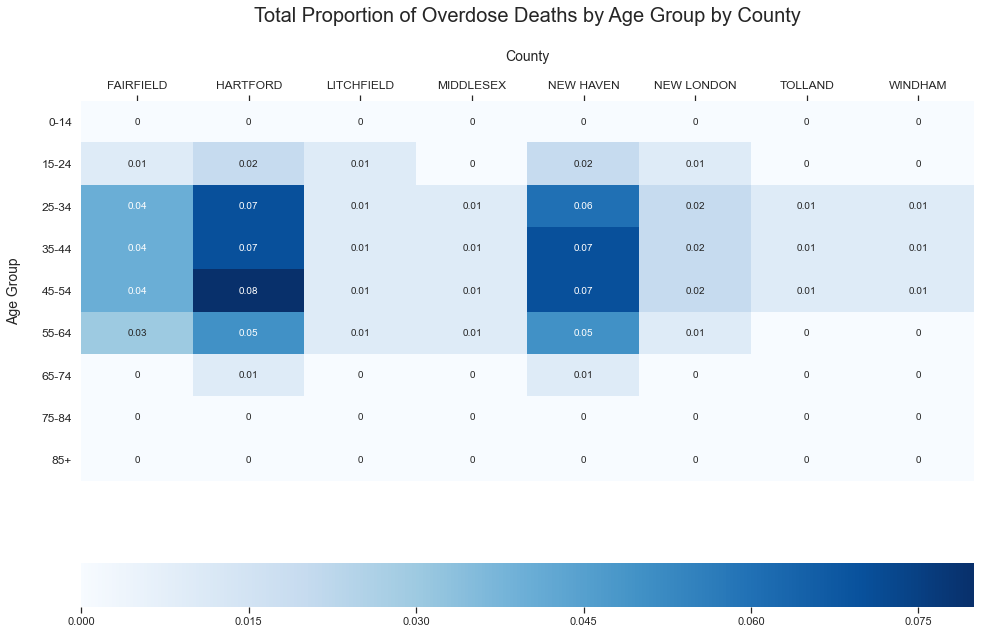

In [19]:
plt.figure(figsize=(16,10))
a = sns.heatmap(pd.crosstab(df['Age_Bin'],df['DeathCounty'],normalize=True).round(2),vmin=0,
            cbar_kws={'orientation': 'horizontal'}, cmap='Blues',annot=True, cbar=True)
plt.title('Total Proportion of Overdose Deaths by Age Group by County\n',fontsize = 20)
a.set_xlabel('County',fontsize = 14)
a.set_ylabel('Age Group\n',fontsize = 14)
plt.yticks(rotation=0)
a.tick_params(labelsize=12)
a.set_xlabel('County\n')    
a.xaxis.set_label_position('top') 
a.xaxis.set_ticks_position('top')
#a.invert_yaxis()

<b> Above: The heat map is showing that Hartford, New Haven, and Fairfield counties represent the largest percentages of total overdose deaths in the state. These counties also happen to be the most populous. We can observe from the heatmap that overdoses are occurring most frequently between the ages of 25-54.</b>

# Conclusions and Next Steps


<b>From the EDA of the data, it was observed that overdose deaths in the state of Connecticut has been a growing problem in the state. Although there was a small reduction of fatalities from 2017 to 2018, the growth trend from 2012 to 2018 is severe. </b> <br>
    
<b>It appears that most deaths are occurring among Males(70%), White/Non-Hispanics(>75%), and people between the ages of 25 to 54 (74%). It was also observed that the majority of overdose deaths involved more than one drug (70%).

By breaking the opiods into their respective categories it was observed that both Heroin and natural and semi-sythetic opioids (most associated with prescription medications) have been showing a decline, however the reduction in these two categories is offset by the dramatic rise of "synthetic opioids" (e.g. Fentanyl).</b>

<b>Next steps in the analysis would be to drill down on a few more questions that came from the EDA:</b><br>
<b>1. How does the data look per county when using crude adjustment rates and age-adjusted rates?</b><br>
<b>2. Are overdose deaths involving more than one drug?</b><br>
<b>3. Visualize the geolocation of deaths per by drug per county.</b><br>
<b>4. Visualize the geolocation data of the deaths per city.</b><br>
